# *k*-means clustering: choosing initial values

In this Notebook you will see how different choices of initial values can affect the final clustering.

You should spend approximately 30 minutes on this Notebook, and around 30 minutes on the iCMA question referenced at the end of the Notebook.

In [1]:
# Standard imports, as well as sklearn.cluster as in the previous Notebook

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import cluster

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


As in the previous Notebook, we will use the football league data to illustrate the behaviour of the clustering algorithm. Again, we start by importing the data from the `football_results.csv` file:

In [2]:
footballResults_df = pd.read_csv('data/football_results.csv', index_col=0)
footballResults_df.head()

,For,Against,Position
Team,,,
Arsenal,68,41,4
Aston Villa,39,61,15
Cardiff City,32,74,20
Chelsea,71,27,3
Crystal Palace,33,48,11


## Initial values for *k*=2

For the clustering algorithm, we can specify the initial centroids. Just making an intelligent guess at the initial values, some plausible starting centroids might be:

    (40, 50)
    
and

    (85, 40).

We can define a DataFrame to contain these initial centroids:

In [3]:
initialCentroids_df = pd.DataFrame({'For':[40, 85], 'Against':[50, 40]}, columns=['For', 'Against'])

initialCentroids_df

,For,Against
0,40,50
1,85,40


and plot these on a scatter plot with the data points:

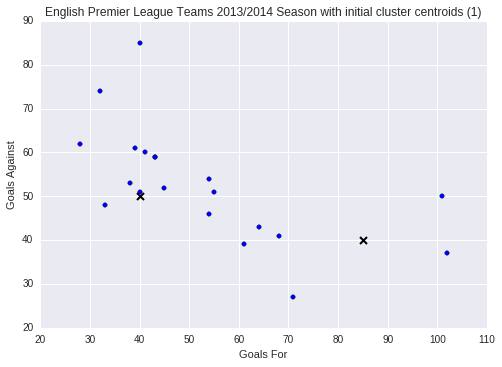

In [4]:
plt.scatter(footballResults_df['For'],
            footballResults_df['Against'])

plt.xlabel('Goals For')
plt.ylabel('Goals Against')

plt.title('English Premier League Teams 2013/2014 Season with initial cluster centroids (1)')

# Plot each of the centroids:
for i in initialCentroids_df.index:
    plt.plot(initialCentroids_df.ix[i]['For'],
             initialCentroids_df.ix[i]['Against'],
             color='black', marker='x', mew=2)


To use these initial values, they need to be specified with the `init` parameter when initialising the clustering object:

In [5]:
# Initial centroids specified in the init parameter
kmeans2 = cluster.KMeans(n_clusters=2,
                         init=initialCentroids_df)

Then as before, we call the `fit` method with the appropriate columns of `footballResults_df`:

In [6]:
assignedClusters_clust = kmeans2.fit(footballResults_df[['For', 'Against']])

assignedClusters_clust.labels_

/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:794: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  n_jobs=self.n_jobs)
/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:601: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if init == 'k-means++':
/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif init == 'random':


array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

... and plot the clustered data along with the final centroids:

[]

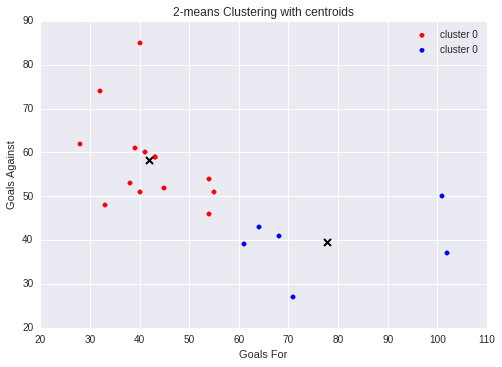

In [7]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==0],
            footballResults_df['Against'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==1],
            footballResults_df['Against'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 0')

# Plot each of the centroids:
for (cx, cy) in assignedClusters_clust.cluster_centers_:
    plt.plot(cx, cy, color='black', marker='x', mew=2)

plt.legend()

plt.xlabel('Goals For')
plt.ylabel('Goals Against')

plt.title('2-means Clustering with centroids')

plt.plot()

Now, suppose that different starting values had been chosen. We will run the clustering algorithm with starting centroids at:

    (44, 45)
    
and

    (53, 73).

Again, we can define a DataFrame with these values:

In [8]:
initialCentroids_df = pd.DataFrame({'For':[44, 53], 'Against':[45, 73]}, columns=['For', 'Against'])

initialCentroids_df

,For,Against
0,44,45
1,53,73


and see where the initial centroids appear on a plot of the data:

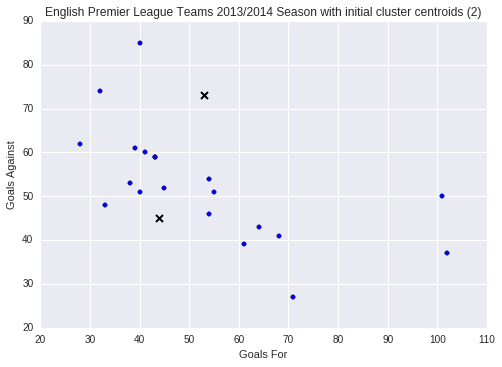

In [9]:
plt.scatter(footballResults_df['For'],
            footballResults_df['Against'])

plt.xlabel('Goals For')
plt.ylabel('Goals Against')

plt.title('English Premier League Teams 2013/2014 Season with initial cluster centroids (2)')

# Plot each of the centroids:
for i in initialCentroids_df.index:
    plt.plot(initialCentroids_df.ix[i]['For'],
             initialCentroids_df.ix[i]['Against'],
             color='black', marker='x', mew=2)


Note that these initial values are very different from the ones we used last time. We can now apply the *k*-means algorithm with *k*=2, and see the result:

In [10]:
kmeans2 = cluster.KMeans(n_clusters=2,
                         init=initialCentroids_df)

assignedClusters_clust = kmeans2.fit(footballResults_df[['For', 'Against']])

assignedClusters_clust.labels_

/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:794: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  n_jobs=self.n_jobs)
/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:601: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if init == 'k-means++':
/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif init == 'random':


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

[]

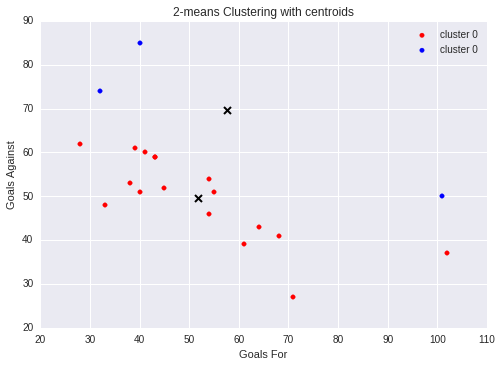

In [11]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==0],
            footballResults_df['Against'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==1],
            footballResults_df['Against'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 0')

# Plot each of the centroids:
for (cx, cy) in assignedClusters_clust.cluster_centers_:
    plt.plot(cx, cy, color='black', marker='x', mew=2)

plt.legend()

plt.xlabel('Goals For')
plt.ylabel('Goals Against')

plt.title('2-means Clustering with centroids')

plt.plot()

These initial conditions have led to a very different and possibly quite unintuitive clustering. Although some might find this clustering to be pretty unconvincing, it does demonstrate two important points. 

First, it is important that you don't assume that a single run of the clustering algorithm has necessarily given you a good result. It is important that you check the output of the clustering algorithm to ensure that the proposed clusters seem reasonable. 

Second, if you choose different starting conditions you won't always get the same results. Some clusterings may seem better than others, or all may seem equally plausible, but there is no such thing as 'the' correct clustering: the final result of the algorithm may be one of several alternative results, and it is important not to treat one set of results as though it is the One True Clustering.

In fact, as the datasets you use get larger and more complex, it is increasingly likely that different initial conditions will lead to different final results.

## What next?

You have now completed this Notebook. You should now be able to answer Question 3 of iCMA 46. You should expect to spend around half an hour on this iCMA question.

If you are working through this Notebook as part of an inline exercise, return to the module materials now.

If you are working through this set of Notebooks as a whole, move on to [`21.3 Visualising clusters with silhouette coefficients`](21.3 Visualising clusters with silhouette coefficients.ipynb).